**Đánh giá giữa kỳ**

Học viên cần xây dựng một bộ phân lớp cho bài toán phân lớp tiêu đề StackOverflow (phân lớp văn bản). Dữ liệu là tập 4 loại tiêu đề bao gồm: 0: 'World News', 1: 'Sports', 2: 'Business', 3: 'Science/Technology'. Các yêu cầu gồm:
1. Xử lý dữ liệu
2. Trích rút thông tin
3. Huấn luyện và đánh giá mô hình

In [1]:
!pip install datasets
from datasets import load_dataset

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.8 MB/s eta 0:00:00


Tập dữ liệu bao gồm các tiêu đề của các bài báo. Nhiệm vụ của bài toán là phân các chủ thề này thành 4 nhóm chủ đề.

Dữ liệu được trích xuất từ thư viện datasets.


## **1. Đọc dữ liệu**
Đọc dữ liệu sử dụng load_dataset, dữ liệu trả là một dictionary gồm 2 phần tử train dataset và test dataset. Hãy load dữ liệu vào dataframe, in ra các giá trị đầu trong dataframe và thống kê số lượng data theo nhãn

In [2]:
# Load AG News dataset
ag_news = load_dataset('ag_news')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/8.07k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [3]:
#Load dữ liệu vào dataframe
import pandas as pd

# YOUR CODE HERE
train_df = pd.DataFrame(ag_news['train'])
test_df = pd.DataFrame(ag_news['test'])

print(train_df.head())

                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2


In [4]:
#thống kê số lượng data theo nhãn

### YOUR CODE HERE
train_df['label'].value_counts()
### YOUR CODE HERE

,count
label,
2,30000
3,30000
1,30000
0,30000


## **2. Xử lý dữ liệu**

Các yêu cầu chính của xử lý dữ liệu bao gồm:
*   Biểu thức chính quy(regex)
*   Chuyển chữ in hoa thành in thường
*   Lemmatization
*   Xoá các từ dừng

In [5]:
#Biểu thức chính quy(regex)
import re
def regex(document):
  text = re.sub(r'[^a-zA-Z0-9\s]', '', document)
  return text

In [6]:
#Chuyển chữ in hoa thành in thường
def text_lowercase(document):
  return document.lower()

In [7]:
#Lemmatization
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def lemmatization(document):
  lemma = WordNetLemmatizer()
  return lemma.lemmatize(document)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [8]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(document):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(document)
    lemmas = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tag(tokens)]
    return " ".join(lemmas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def remove_stopword(document):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(document)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  return " ".join(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
#Hàm xử lý dữ liệu
def text_preprocess(document):
  document = regex(document)
  document = text_lowercase(document)
  document = lemmatization(document)
  document = remove_stopword(document)
  return document

#Xử dụng hàm tiền xử lý dữ liệu
processed_train_df = train_df.copy()
processed_train_df['text'] = processed_train_df['text'].apply(text_preprocess)

print(train_df.head())

print(processed_train_df['text'].head())


                                                text  label
0  Wall St. Bears Claw Back Into the Black (Reute...      2
1  Carlyle Looks Toward Commercial Aerospace (Reu...      2
2  Oil and Economy Cloud Stocks' Outlook (Reuters...      2
3  Iraq Halts Oil Exports from Main Southern Pipe...      2
4  Oil prices soar to all-time record, posing new...      2
0    wall st bear claw back black reuters reuters s...
1    carlyle look toward commercial aerospace reute...
2    oil economy cloud stock outlook reuters reuter...
3    iraq halt oil export main southern pipeline re...
4    oil price soar alltime record pose new menace ...
Name: text, dtype: object


## **3. Trích rút thông tin**
Sử dụng TF_IDF để trích xuất thông tin (hoặc có thể sử dụng các phương pháp khác như CountVector,...)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=50000)


X_train = vectorizer.fit_transform(processed_train_df['text'])
X_test = vectorizer.transform(test_df['text'])

print(f"Feature matrix shape (Training): {X_train.shape}")

Feature matrix shape (Training): (120000, 50000)


## **4. Huấn luyện và đánh giá mô hình** ##

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(max_iter=5000)


model.fit(X_train, train_df['label'])

y_pred = model.predict(X_test)
accuracy = accuracy_score(test_df['label'], y_pred)

print(classification_report(test_df['label'], y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1900
           1       0.94      0.98      0.96      1900
           2       0.89      0.84      0.86      1900
           3       0.87      0.89      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600



In [13]:
#Vẽ confusion matrix với tập test
### YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(test_df['label'], y_pred)

# plt.figure(figsize=(8, 6))
# cm.plot()
# plt.show()
### YOUR CODE HERE

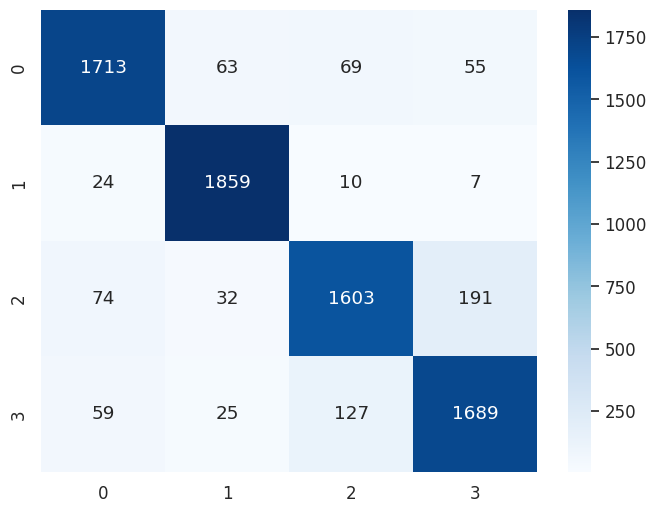

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)

ax = sns.heatmap(cm, annot=True, fmt='d', cmap = 'Blues')
plt.show()


## **5. Thử nghiệm mô hình** ##

In [15]:
def test_model(model, vectorizer, examples):

    processed_examples = [text_preprocess(example) for example in examples]
    example_features = vectorizer.transform(processed_examples)

    predictions = model.predict(example_features)

    category_labels = {
        0: 'World News',
        1: 'Sports',
        2: 'Business',
        3: 'Science/Technology'
    }

    predicted_categories = [category_labels[prediction] for prediction in predictions]

    for example, category in zip(examples, predicted_categories):
        print(f"Example: {example}")
        print(f"Predicted Category: {category}")
        print("-" * 20)  # Separator for better readability


In [18]:
test_examples = [
    "The team won the championship match last night!",
    "NASA has announced a new mission to Mars.",
    "The stock market has been very volatile this week.",
    "Ronaldo is the best football player in the world",
    "Donald Trump is the president of USA"
]

test_model(model, vectorizer, test_examples)

Example: The team won the championship match last night!
Predicted Category: Sports
--------------------
Example: NASA has announced a new mission to Mars.
Predicted Category: Science/Technology
--------------------
Example: The stock market has been very volatile this week.
Predicted Category: Business
--------------------
Example: Ronaldo is the best football player in the world
Predicted Category: Sports
--------------------
Example: Donald Trump is the president of USA
Predicted Category: Business
--------------------
